#importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("D:/Data Science/Oasis InfoByte/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
df.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN

In [15]:
df.shape

(768, 7)

In [16]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [18]:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region"]
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.style.background_gradient(cmap='Reds')

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.650000,11999139.000000,43.240000,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.050000,11755881.000000,42.050000,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.750000,12086707.000000,43.500000,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.320000,12285693.000000,43.970000,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.170000,12256762.000000,44.680000,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.520000,12017412.000000,43.010000,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.120000,11397681.000000,41.000000,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.380000,12528395.000000,45.140000,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.840000,12016676.000000,43.460000,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.910000,11723617.000000,42.830000,Rural


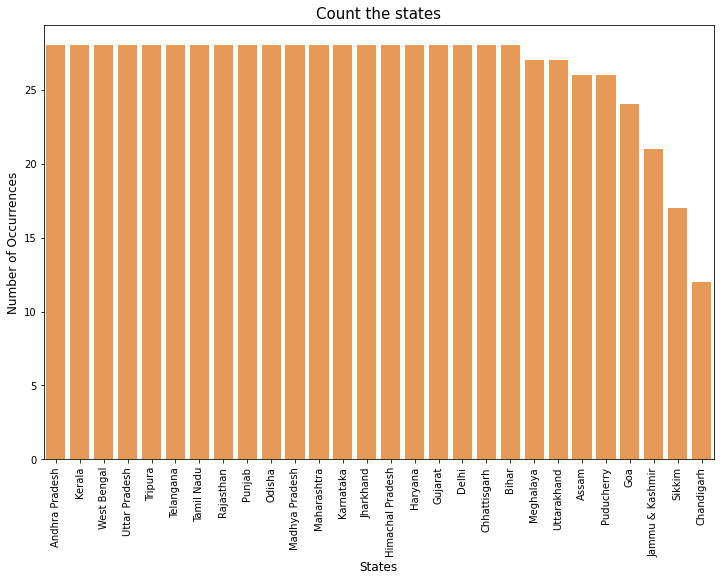

In [20]:
color = sns.color_palette()
cnt_srs = df.States.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#mean of estimated unemployment by state

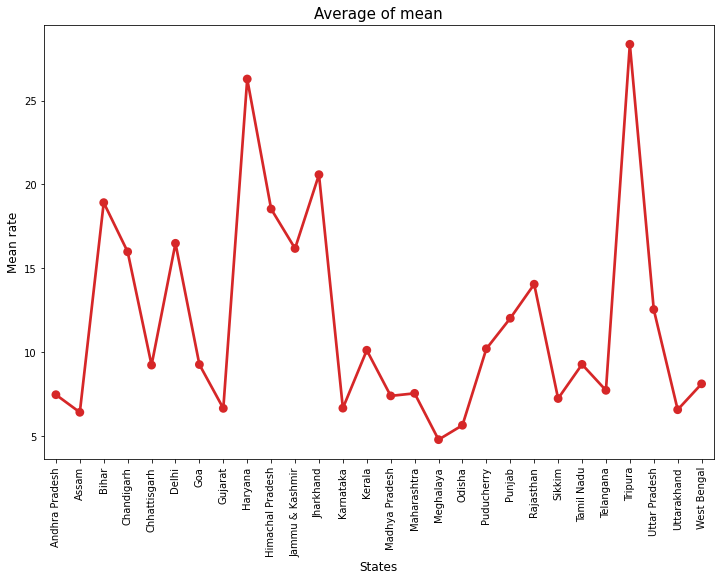

In [21]:
grouped_df = df.groupby(["States"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['States'].values, grouped_df['Estimated Unemployment Rate'].values, alpha=0.8, color=color[3])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
make_total = df.pivot_table("Estimated Unemployment Rate",index=['States'],aggfunc='mean')
topstate=make_total.sort_values(by='Estimated Unemployment Rate',ascending=False)[:47]
print(topstate)

                  Estimated Unemployment Rate
States                                       
Tripura                             28.350357
Haryana                             26.283214
Jharkhand                           20.585000
Bihar                               18.918214
Himachal Pradesh                    18.540357
Delhi                               16.495357
Jammu & Kashmir                     16.188571
Chandigarh                          15.991667
Rajasthan                           14.058214
Uttar Pradesh                       12.551429
Punjab                              12.031071
Puducherry                          10.215000
Kerala                              10.123929
Tamil Nadu                           9.284286
Goa                                  9.274167
Chhattisgarh                         9.240357
West Bengal                          8.124643
Telangana                            7.737857
Maharashtra                          7.557500
Andhra Pradesh                    

In [ ]:
# take the mean of estimated labour participation by state

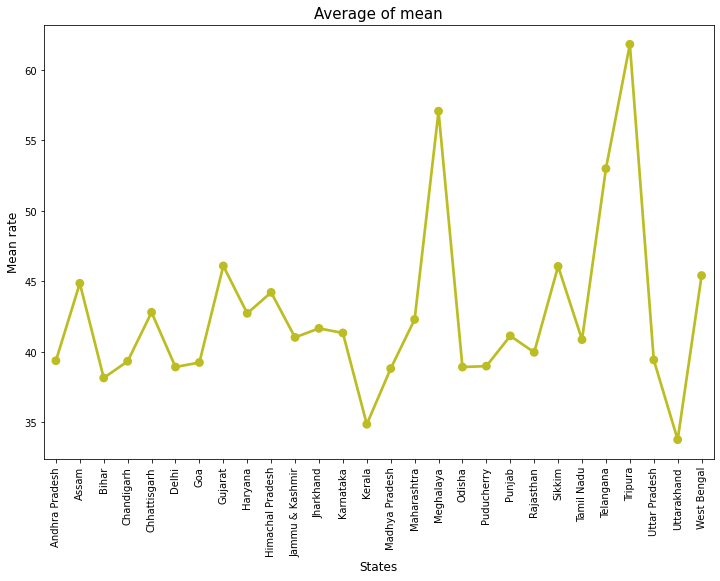

In [23]:
grouped_df = df.groupby(["States"])["Estimated Labour Participation Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['States'].values, grouped_df['Estimated Labour Participation Rate'].values, alpha=0.8, color=color[8])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
make_total = df.pivot_table("Estimated Labour Participation Rate",index=['States'],aggfunc='mean')
topstate=make_total.sort_values(by='Estimated Labour Participation Rate',ascending=False)[:47]
print(topstate)

                  Estimated Labour Participation Rate
States                                               
Tripura                                     61.823929
Meghalaya                                   57.080741
Telangana                                   53.002500
Gujarat                                     46.101071
Sikkim                                      46.070000
West Bengal                                 45.417500
Assam                                       44.868462
Himachal Pradesh                            44.222143
Chhattisgarh                                42.810714
Haryana                                     42.737143
Maharashtra                                 42.303214
Jharkhand                                   41.670714
Karnataka                                   41.345357
Punjab                                      41.138214
Jammu & Kashmir                             41.030952
Tamil Nadu                                  40.872143
Rajasthan                   

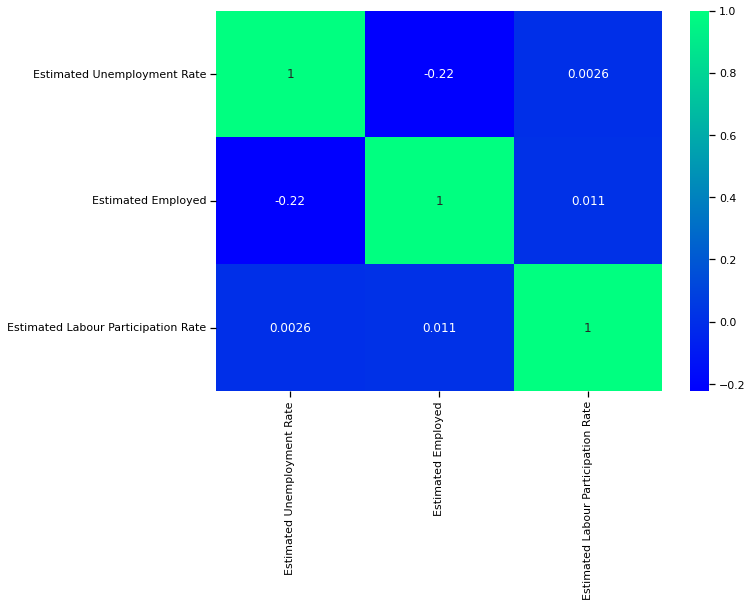

In [25]:
heat_maps = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='winter');

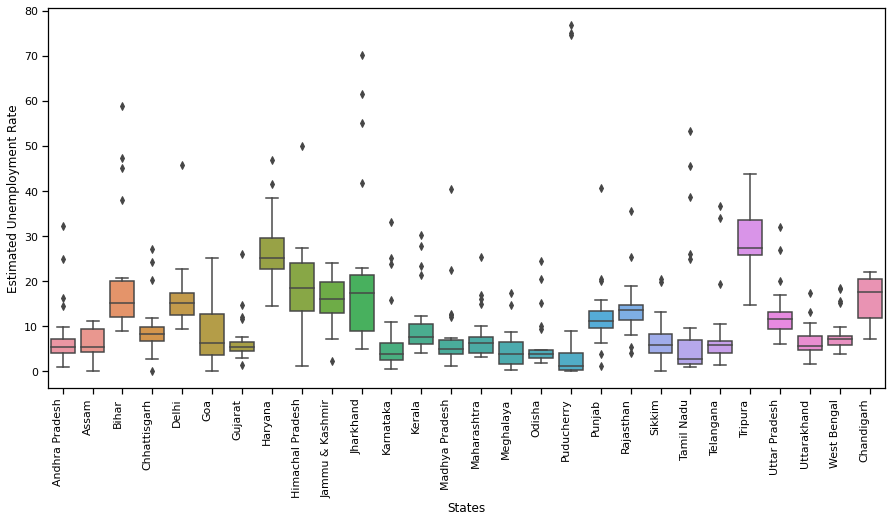

In [26]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='States',y='Estimated Unemployment Rate',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [35]:
df.fillna(df.mean(), inplace=True)

In [37]:
fig = px.scatter_matrix(df,dimensions=['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate'],
                        color='Region',
                        template='plotly')
fig.show()

KeyError: (nan, '')

In [38]:
plot_ump = df[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='Estimated Unemployment Rate',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [39]:
plot_ump = df[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()